In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

def wateryear(index):
    year = index.year
    strt = pd.datetime(year,10,1) # start of the next water year+1
    
    if index<strt:
        wyear = year
    elif index>=strt: 
        wyear = year+1

    return wyear

In [2]:
strt = '2000-10-01'
nd = '2012-9-30'

In [3]:
niwot = pd.read_pickle('/RHESSys/ComoCreek_new/clim/niwot_snotel.pcl')[strt:nd]

niwot['wateryear']=niwot.index.map(wateryear)
niwot['accumP']=np.NAN
for wy in niwot.wateryear:
    niwot.loc[niwot.wateryear==wy,'accumP']=niwot.loc[niwot.wateryear==wy,'precip'].cumsum()

c1_P1 = pd.read_pickle('/RHESSys/ComoCreek_new/clim/C1_chart_prec.pcl')[strt:nd]
for i in c1_P1.index:
    
    # skip entries that are only one day
    if (c1_P1.loc[i,'Qual_days'] == 1) or (np.isnan(c1_P1.loc[i,'Qual_days']) == True):
        continue
    else:
        days = c1_P1.loc[i,'Qual_days']
        td = pd.datetools.timedelta(days-1)
        strt2 = i-td
        c1_P1.loc[strt2:i,'P'] = c1_P1.loc[i,'P']/float(days)
        c1_P1.loc[strt2:i,'Qual_days'] = 1.
        c1_P1.loc[strt2:i,'flag'] = 'F'

c1_P1.P /= 1000 # convert from mm to m
        
c1_T1 = pd.read_pickle('/RHESSys/ComoCreek_new/clim/C1_chart_temp.pcl')[strt:nd]

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.


In [4]:
c1 = pd.DataFrame({'Tave':c1_T1.Tave,'Tmin':c1_T1.Tmin,'Tmax':c1_T1.Tmax,'P':c1_P1.P})
c1['wateryear']=c1.index.map(wateryear)

c1['accumP']=np.NAN
for wy in c1.wateryear:
    c1.loc[c1.wateryear==wy,'accumP']=c1.loc[c1.wateryear==wy,'P'].cumsum()

In [5]:
boulder = pd.read_pickle('../greenness_timing/data/boulder_co.pcl')
boulder['wateryear'] = boulder.index.map(wateryear)

boulder['accumP']=np.NAN
for wy in boulder.wateryear:
    boulder.loc[boulder.wateryear==wy,'accumP']=boulder.loc[boulder.wateryear==wy,'P'].cumsum()

In [6]:
strt = '2006-10-1'
nd = '2007-9-30'

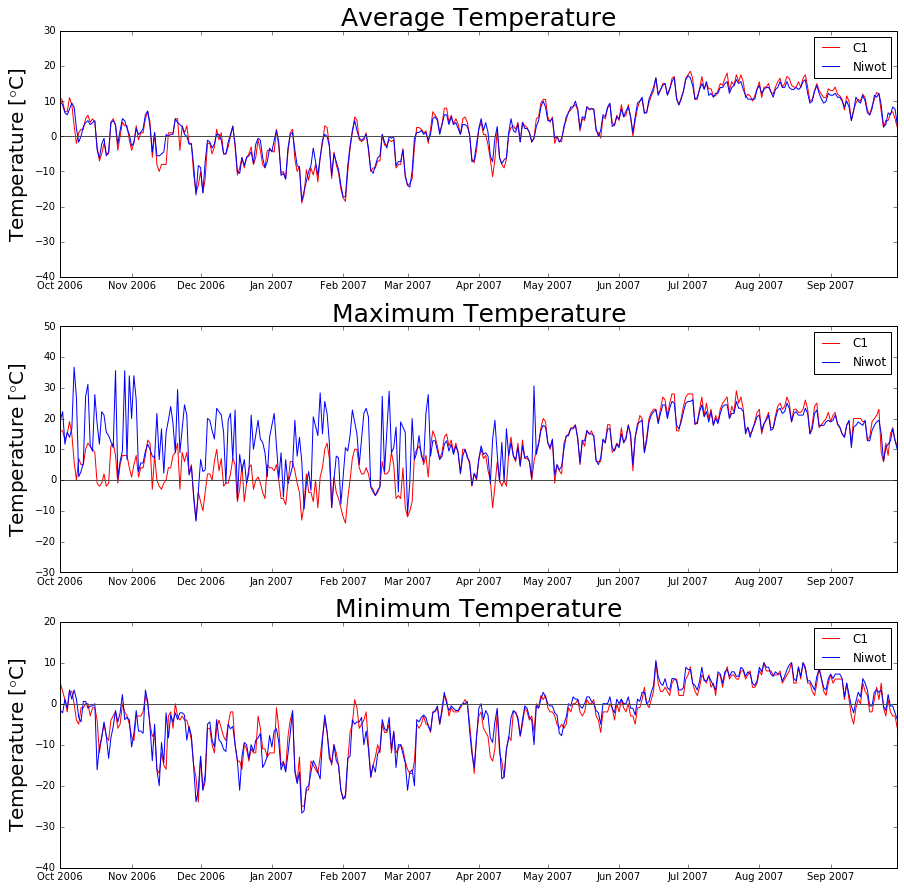

In [7]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(311)
ax.plot(c1.index,c1.Tave,'-r',niwot.index,niwot.ATave,'-b')
plt.xlim(strt,nd)
plt.legend(['C1','Niwot'])
plt.axhline(0,c='0.3')
ax.set_ylabel('Temperature [$\degree$C]', fontsize=20)
ax.set_title('Average Temperature',fontsize=25)

ax = fig.add_subplot(312)
ax.plot(c1.index,c1.Tmax,'-r',niwot.index,niwot.ATmax,'-b')
plt.xlim(strt,nd)
plt.legend(['C1','Niwot'])
plt.axhline(0,c='0.3')
ax.set_ylabel('Temperature [$\degree$C]', fontsize=20)
ax.set_title('Maximum Temperature',fontsize=25)

ax = fig.add_subplot(313)
ax.plot(c1.index,c1.Tmin,'-r',niwot.index,niwot.ATmin,'-b')
plt.xlim(strt,nd)
plt.legend(['C1','Niwot'])
plt.axhline(0,c='0.3')
ax.set_ylabel('Temperature [$\degree$C]', fontsize=20)
ax.set_title('Minimum Temperature',fontsize=25)

In [32]:
c1.to_pickle('/RHESSys/ComoCreek_new/clim/c1_combined.df')

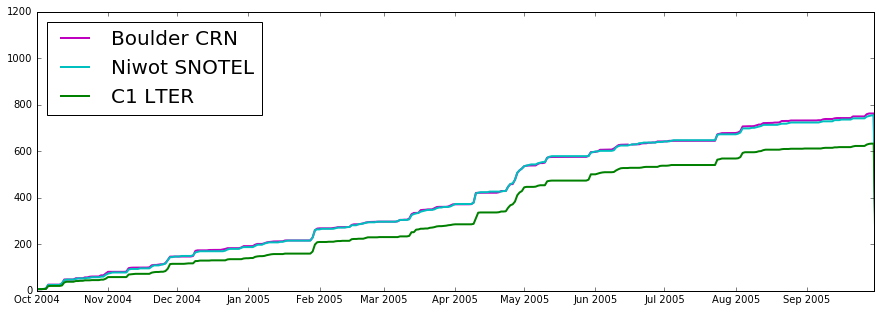

In [11]:
wy = 2005
strt = str(wy-1)+'-10-1'
nd = str(wy)+'-9-30'
plt.figure(figsize=(15,5))
plt.plot(boulder.index,boulder.accumP,'-m',niwot.index,niwot.accumP*1000,'-c',c1.index,c1.accumP*1000,'-g',lw=2)
plt.xlim(strt,nd)
plt.legend(['Boulder CRN','Niwot SNOTEL','C1 LTER'], fontsize=20,loc='upper left')

In [28]:
boulder.index.min()

Timestamp('2003-09-27 00:00:00')